In [2]:
addpath(genpath('/tmp/bart'));

In [3]:
und2x2 = readcfl('/tmp/espirit-matlab-examples/data/und2x2');
ksp_rss = bart('rss 8', und2x2);

In [4]:
% zero-filled reconstruction sqrt-sum-of-squares
zf_coils = bart('fft -i 6', und2x2);
zf_rss = bart('rss 8', zf_coils);

ksp_rss = squeeze(ksp_rss);
zf_coils = squeeze(zf_coils);
zf_rss = squeeze(zf_rss);

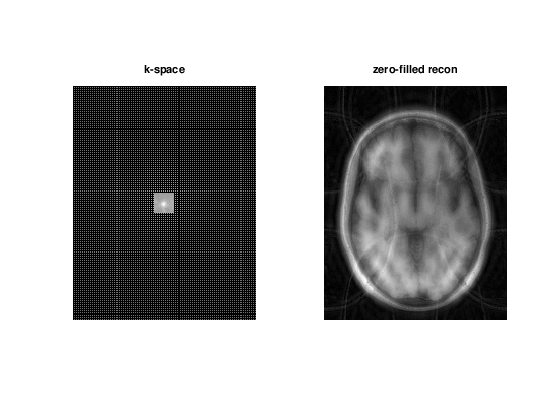

In [5]:
figure,subplot(1,2,1), imshow(abs(ksp_rss).^0.125, []); title('k-space')
subplot(1,2,2), imshow(abs(zf_rss), []); title('zero-filled recon')